## Comparison of Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
S01_filter_data = pd.read_csv('./filter/S01_filter_HIS164.csv', index_col=0)
S05_filter_data = pd.read_csv('./filter/S05_filter_HIS164.csv', index_col=0)
p12_filter_data = pd.read_csv('./filter/p12_filter_HIS164.csv', index_col=0)
p13_filter_data = pd.read_csv('./filter/p13_filter_HIS164.csv', index_col=0)

S01_corr_data = S01_filter_data.apply(lambda x: x/2)
S05_corr_data = S05_filter_data.apply(lambda x: x/2)
p12_corr_data = p12_filter_data.apply(lambda x: x/2)
p13_corr_data = p13_filter_data.apply(lambda x: x/2)

S01_sort_data = S01_corr_data.sort_values(by=['HIS_164'], ascending=False)
S05_sort_data = S05_corr_data.sort_values(by=['HIS_164'], ascending=False)
p12_sort_data = p12_corr_data.sort_values(by=['HIS_164'], ascending=False)
p13_sort_data = p13_corr_data.sort_values(by=['HIS_164'], ascending=False)

In [12]:
S01_HIS_data = S01_sort_data.rename(columns={"HIS_164": "S01_HIS164"})
S05_HIS_data = S05_sort_data.rename(columns={"HIS_164": "S05_HIS164"})
p12_HIS_data = p12_sort_data.rename(columns={"HIS_164": "p12_HIS164"})
p13_HIS_data = p13_sort_data.rename(columns={"HIS_164": "p13_HIS164"})

In [47]:
S01_S05_merge = pd.concat([S01_HIS_data, S05_HIS_data], axis=1, join='inner')
S01_p12_merge = pd.concat([S01_HIS_data, p12_HIS_data], axis=1, join='inner')
S01_p13_merge = pd.concat([S01_HIS_data, p13_HIS_data], axis=1, join='inner')

In [48]:
S01_S05_merge.to_csv('./processed/S01-S05/S01_S05_merge.csv')
S01_p12_merge.to_csv('./processed/S01-p12/S01_p12_merge.csv')
S01_p13_merge.to_csv('./processed/S01-p13/S01_p13_merge.csv')

In [49]:
print("Comparison between S01 and S05:\n", S01_S05_merge)
print("Comparison between S01 and p12:\n", S01_p12_merge)
print("Comparison between S01 and p13:\n", S01_p13_merge)

Comparison between S01 and S05:
          S01_HIS164  S05_HIS164
HIS_41    -0.200100   -0.356262
TYR_54    -0.239086   -0.121957
HIS_163   -0.434800   -0.454228
ASP_187   -0.547463   -0.530493
Comparison between S01 and p12:
          S01_HIS164  p12_HIS164
ARG_40     0.136191    0.421021
ASP_601   -0.100099    0.329393
ASP_554   -0.102882   -0.106368
GLU_484   -0.107326   -0.149818
TYR_161   -0.149983   -0.172340
HIS_41    -0.200100   -0.695906
TYR_54    -0.239086   -0.300246
HIS_163   -0.434800   -0.426208
ASP_187   -0.547463   -0.521776
Comparison between S01 and p13:
          S01_HIS164  p13_HIS164
ARG_40     0.136191    0.192160
ASP_601   -0.100099   -0.165794
TYR_161   -0.149983   -0.252738
HIS_41    -0.200100   -0.336241
TYR_54    -0.239086   -0.250716
HIS_163   -0.434800   -0.472487
ASP_187   -0.547463   -0.539423


## Visualization of Comparison

In [53]:
S01_S05_index = S01_S05_merge.index.values.tolist()
S01_p12_index = S01_p12_merge.index.values.tolist()
S01_p13_index = S01_p13_merge.index.values.tolist()


def extract_orders(index):
    order_list = []
    for res in index:
        temp_order = res[4:]
        temp_num = int(temp_order)
        order_list.append(temp_num)
    return order_list


S01_S05_x = extract_orders(S01_S05_index)
S01_p12_x = extract_orders(S01_p12_index)
S01_p13_x = extract_orders(S01_p13_index)

* Warning: The dash lines in the plot do not mean the tendency since the sequence of residues is actually discrete. Using dash lines just help show the sequence of points.

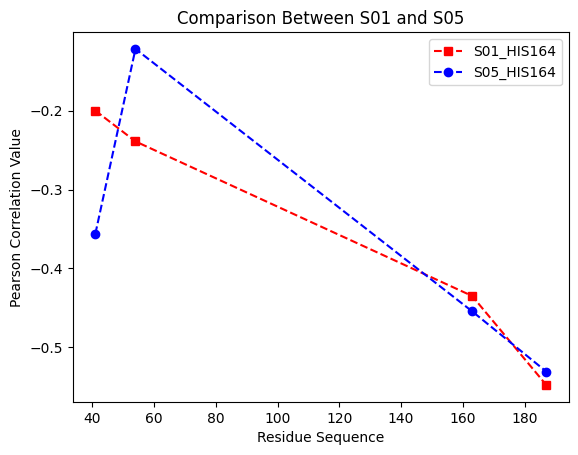

In [79]:
S01_S05_y = list(S01_S05_merge['S01_HIS164'])
S05_y = list(S01_S05_merge['S05_HIS164'])
plt.plot(S01_S05_x, S01_S05_y, 's--', color='red', label='S01_HIS164')
plt.plot(S01_S05_x, S05_y, 'o--', color='blue', label='S05_HIS164')

plt.xlabel('Residue Sequence')
plt.ylabel('Pearson Correlation Value')
plt.legend(loc='best')
plt.title('Comparison Between S01 and S05')
plt.savefig('./figure/difference_subtract/S01_S05_HIS164.png')
plt.show()

In [74]:
# function used to sort x and y altogether
def sort_dict(x, sy, py):
    init_dict = {}
    for i in range(len(x)):
        init_dict[x[i]] = [sy[i], py[i]]
    sort_dict = sorted(init_dict.items(), key=lambda d: d[0], reverse=False)
    sort_x = []
    sort_sy = []
    sort_py = []
    for k, v in sort_dict:
        sort_x.append(k)
        sort_sy.append(v[0])
        sort_py.append(v[1])
    return sort_x, sort_sy, sort_py

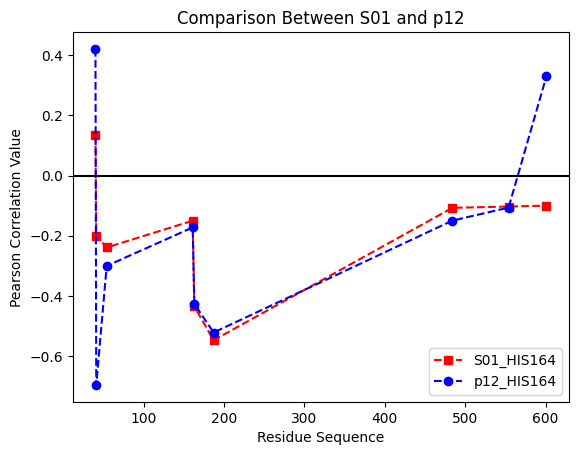

In [80]:
S01_p12_y = list(S01_p12_merge['S01_HIS164'])
p12_y = list(S01_p12_merge['p12_HIS164'])
S01_p12_sort_x, S01_p12_sort_y, p12_sort_y = sort_dict(S01_p12_x, S01_p12_y, p12_y)
plt.plot(S01_p12_sort_x, S01_p12_sort_y, 's--', color='red', label='S01_HIS164')
plt.plot(S01_p12_sort_x, p12_sort_y, 'o--', color='blue', label='p12_HIS164')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Pearson Correlation Value')
plt.legend(loc='best')
plt.title('Comparison Between S01 and p12')
plt.savefig('./figure/difference_subtract/S01_p12_HIS164.png')
plt.show()

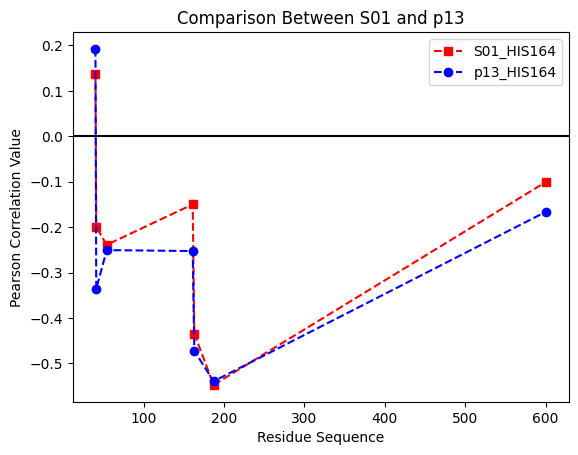

In [81]:
S01_p13_y = list(S01_p13_merge['S01_HIS164'])
p13_y = list(S01_p13_merge['p13_HIS164'])
S01_p13_sort_x, S01_p13_sort_y, p13_sort_y = sort_dict(S01_p13_x, S01_p13_y, p13_y)
plt.plot(S01_p13_sort_x, S01_p13_sort_y, 's--', color='red', label='S01_HIS164')
plt.plot(S01_p13_sort_x, p13_sort_y, 'o--', color='blue', label='p13_HIS164')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Pearson Correlation Value')
plt.legend(loc='best')
plt.title('Comparison Between S01 and p13')
plt.savefig('./figure/difference_subtract/S01_p13_HIS164.png')
plt.show()